In [67]:
import pandas as pd
import numpy as np
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(url)[12]
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [27]:
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012    2014        2019
0              Крим  230.0  206.0  160.0   130    73   126  111.44   80.173913
1         Вінницька  224.0  192.0  142.0   124    84   112  109.00   76.000000
2         Волинська  247.0  250.0  179.0   153   112   148  141.00  101.000000
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111.00   71.000000
4          Донецька  271.0  214.0  140.0   109    61    98   82.00   80.173913


In [5]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
print(df.shape)

(28, 9)


In [26]:
#Замініть у таблиці значення "—" на значення NaN
df = df.replace({'—': np.NaN})
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,111.44,80.173913
1,Вінницька,224.0,192.0,142.0,124,84,112,109.00,76.000000
2,Волинська,247.0,250.0,179.0,153,112,148,141.00,101.000000
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.00,71.000000
4,Донецька,271.0,214.0,140.0,109,61,98,82.00,80.173913


In [ ]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [59]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
nan_columns = df.columns[df.isnull().any()].tolist()
df[nan_columns] = df[nan_columns].astype(float)

df.dtypes

Регіон    object
1950      object
1960      object
1970      object
1990      object
2000      object
2012      object
2014      object
2019      object
dtype: object

In [58]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
df.isnull().sum() / len(df)

Регіон   NaN
1950     NaN
1960     NaN
1970     NaN
1990     NaN
2000     NaN
2012     NaN
2014     NaN
2019     NaN
dtype: float64

In [68]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
df = df.drop([27], axis=0)
df.tail(10)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
17,Сумська,216.0,184.0,132.0,115,70,97,92,60
18,Тернопільська,213.0,216.0,157.0,142,92,113,109,76
19,Харківська,197.0,173.0,140.0,114,68,99,101,68
20,Херсонська,208.0,214.0,166.0,143,85,117,115,81
21,Хмельницька,234.0,198.0,148.0,129,85,113,112,79
22,Черкаська,205.0,179.0,144.0,123,75,100,98,64
23,Чернівецька,247.0,218.0,170.0,148,101,128,129,92
24,Чернігівська,220.0,183.0,127.0,108,69,94,90,61
25,Київ,NaN,174.0,159.0,120,73,120,121,110
26,Севастополь,NaN,NaN,NaN,125,70,120,—,—


In [69]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
df = df.fillna(df.mean(numeric_only=True), axis=0)
df.head(10)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


In [12]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
df['2019'] = df['2019'].replace('—', np.nan)

# Преобразуем столбец в числовой формат
df['2019'] = df['2019'].astype(float)

# Теперь можно вычислить среднее значение
avg = df['2019'].mean()

# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
result_df = df[df['2019'] > avg]

# Вывести результат
result_df, avg

(               Регіон    1950   1960   1970  1990  2000  2012   2014   2019
 2           Волинська  247.00  250.0  179.0   153   112   148  141.0  101.0
 6        Закарпатська  314.00  273.0  207.0   168   115   151  146.0  104.0
 8   Івано-Франківська  243.00  248.0  182.0   155   103   124  122.0   88.0
 12          Львівська  234.00  240.0  171.0   140    91   119  119.0   87.0
 14            Одеська  241.00  192.0  148.0   126    80   127  123.0   88.0
 16         Рівненська  269.00  267.0  193.0   158   118   159  148.0  107.0
 20         Херсонська  208.00  214.0  166.0   143    85   117  115.0   81.0
 23        Чернівецька  247.00  218.0  170.0   148   101   128  129.0   92.0
 25               Київ  231.04  174.0  159.0   120    73   120  121.0  110.0,
 80.17391304347828)

In [13]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
df['2019'] = df['2019'].replace('—', np.nan)

# Преобразуем столбец в числовой формат
df['2019'] = df['2019'].astype(float)

# Теперь можно вычислить среднее значение
avg = df['2019'].mean()

# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
result_df = df[df['2019'] > avg]

# Вывести результат
result_df, avg

(               Регіон    1950   1960   1970  1990  2000  2012   2014   2019
 2           Волинська  247.00  250.0  179.0   153   112   148  141.0  101.0
 6        Закарпатська  314.00  273.0  207.0   168   115   151  146.0  104.0
 8   Івано-Франківська  243.00  248.0  182.0   155   103   124  122.0   88.0
 12          Львівська  234.00  240.0  171.0   140    91   119  119.0   87.0
 14            Одеська  241.00  192.0  148.0   126    80   127  123.0   88.0
 16         Рівненська  269.00  267.0  193.0   158   118   159  148.0  107.0
 20         Херсонська  208.00  214.0  166.0   143    85   117  115.0   81.0
 23        Чернівецька  247.00  218.0  170.0   148   101   128  129.0   92.0
 25               Київ  231.04  174.0  159.0   120    73   120  121.0  110.0,
 80.17391304347828)

In [15]:
# Найти регион с наивысшей рождаемостью в 2014 году
# Заменяем символ "—" на NaN и преобразуем столбец '2014' в числовой формат
df['2014'] = df['2014'].replace('—', np.nan).astype(float)

# Находим регион с наивысшей рождаемостью в 2014 году
region_with_highest_birth_rate_2014 = df[df['2014'] == df['2014'].max()]
highest_birth_rate_region_2014 = region_with_highest_birth_rate_2014.iloc[0]['Регіон']

print("Регіон з найвищою народжуваністю в 2014 році:")
print(highest_birth_rate_region_2014)

Регіон з найвищою народжуваністю в 2014 році:
Рівненська


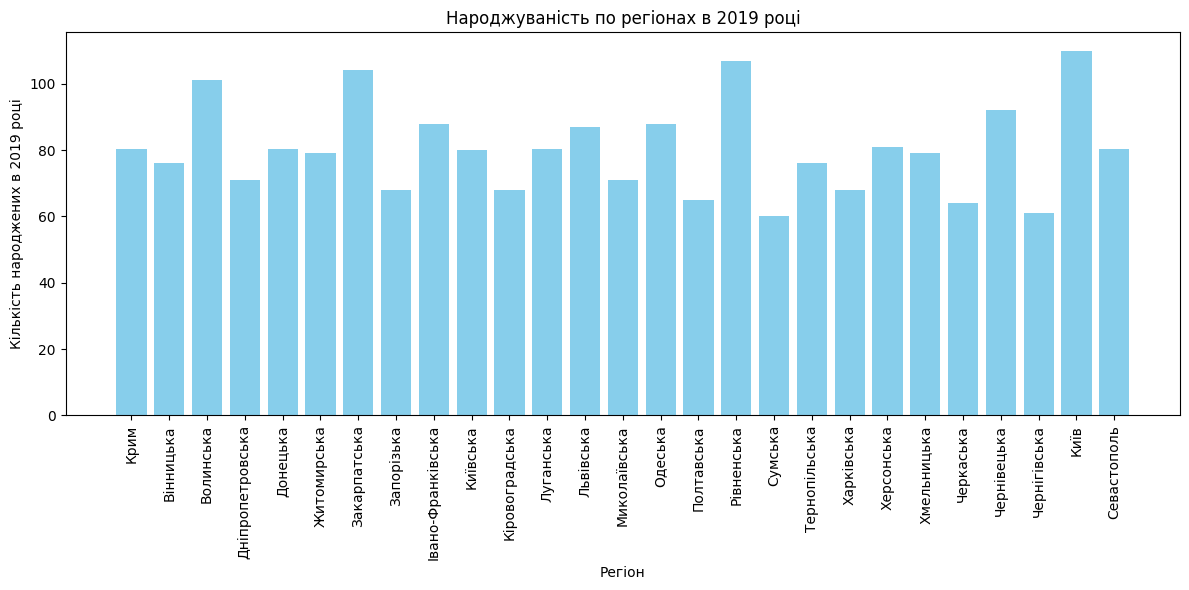

In [16]:
import matplotlib.pyplot as plt

# Фильтруем DataFrame, чтобы получить только столбцы 'Регіон' и '2019'
birth_rates_2019 = df[['Регіон', '2019']]

# Убираем строки с отсутствующими данными (NaN) в столбце '2019'
birth_rates_2019 = birth_rates_2019.dropna()

# Устанавливаем размер графика
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму
plt.bar(birth_rates_2019['Регіон'], birth_rates_2019['2019'], color='skyblue')
plt.title('Народжуваність по регіонах в 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Кількість народжених в 2019 році')

# Поворачиваем подписи регионов для лучшей читаемости
plt.xticks(rotation=90)

# Отображаем график
plt.tight_layout()
plt.show()

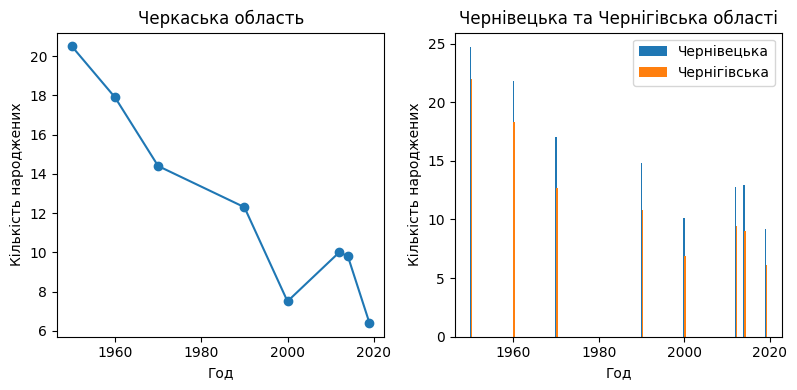

In [17]:
import matplotlib.pyplot as plt

# Данные
regions = ['Черкаська', 'Чернівецька', 'Чернігівська', 'Київ', 'Севастополь']
years = [1950, 1960, 1970, 1990, 2000, 2012, 2014, 2019]
birth_rates = [
    [20.5, 17.9, 14.4, 12.3, 7.5, 10.0, 9.8, 6.4],
    [24.7, 21.8, 17.0, 14.8, 10.1, 12.8, 12.9, 9.2],
    [22.0, 18.3, 12.7, 10.8, 6.9, 9.4, 9.0, 6.1],
    [None, 17.4, 15.9, 12.0, 7.3, 12.0, 12.1, 11.0],
    [None, None, None, 12.5, 7.0, 12.0, None, None]
]

# Создаем три разных графика
plt.figure(figsize=(12, 4))

# График 1: Линейная диаграмма для одного региона (например, Черкаська)
plt.subplot(131)
plt.plot(years, birth_rates[0], marker='o', linestyle='-')
plt.title('Черкаська область')
plt.xlabel('Год')
plt.ylabel('Кількість народжених')

# График 2: Столбчатая диаграмма для нескольких регионов (например, Чернівецька та Чернігівська)
plt.subplot(132)
plt.bar(years, birth_rates[1], width=0.4, label='Чернівецька', align='center')
plt.bar(years, birth_rates[2], width=0.4, label='Чернігівська', align='edge')
plt.title('Чернівецька та Чернігівська області')
plt.xlabel('Год')
plt.ylabel('Кількість народжених')
plt.legend()

# Выводим графики
plt.tight_layout()
plt.show()